In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

1. DATA (univariate, multivariate)
2.EDA  (components[trends,resid,seasonal],rolling_stats,movgavg)
3.How to do staionary data
4.ModelBuilding(ARIMA/SARIMA)

In [2]:
p=pd.read_csv("PH-Sales.csv")
p.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [3]:
len(p['Month-Year'])

144

In [4]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
#frequency-----MS-month wise(satrt-1) periods=144(it will print 144 monthwise)
#frequency-----M-month wise(satrt-31)
dates=pd.date_range(start='2003-01-01',freq="MS",periods=len(p))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [6]:
len(dates)

144

In [7]:
dates.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', length=144)

In [8]:
#check seasonality respect to the dataset
p['month']=dates.month

In [9]:
p['year']=dates.year

In [10]:
p

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [11]:
# convert into month
import calendar
p['Month']=p['month'].apply(lambda x:calendar.month_abbr[x])

In [12]:
p

,Month-Year,Number of Tractor Sold,month,year,Month
0,Jan-03,141,1,2003,Jan
1,Feb-03,157,2,2003,Feb
2,Mar-03,185,3,2003,Mar
3,Apr-03,199,4,2003,Apr
4,May-03,203,5,2003,May
...,...,...,...,...,...
139,Aug-14,848,8,2014,Aug
140,Sep-14,640,9,2014,Sep
141,Oct-14,581,10,2014,Oct
142,Nov-14,519,11,2014,Nov


In [13]:
#rename column name Number of Tractor Sold":"Tractor-Sales"
p.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)

In [14]:
p

,Month-Year,Tractor-Sales,month,year,Month
0,Jan-03,141,1,2003,Jan
1,Feb-03,157,2,2003,Feb
2,Mar-03,185,3,2003,Mar
3,Apr-03,199,4,2003,Apr
4,May-03,203,5,2003,May
...,...,...,...,...,...
139,Aug-14,848,8,2014,Aug
140,Sep-14,640,9,2014,Sep
141,Oct-14,581,10,2014,Oct
142,Nov-14,519,11,2014,Nov


In [15]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [16]:
#setting index value as dates
p.set_index(dates,inplace=True)

In [17]:
p

,Month-Year,Tractor-Sales,month,year,Month
2003-01-01,Jan-03,141,1,2003,Jan
2003-02-01,Feb-03,157,2,2003,Feb
2003-03-01,Mar-03,185,3,2003,Mar
2003-04-01,Apr-03,199,4,2003,Apr
2003-05-01,May-03,203,5,2003,May
...,...,...,...,...,...
2014-08-01,Aug-14,848,8,2014,Aug
2014-09-01,Sep-14,640,9,2014,Sep
2014-10-01,Oct-14,581,10,2014,Oct
2014-11-01,Nov-14,519,11,2014,Nov


In [18]:
p=p[["Tractor-Sales","Month","year"]]

In [19]:
#final format os time-series data
p.head(5)

,Tractor-Sales,Month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [20]:
p.describe()

,Tractor-Sales,year
count,144.000000,144.000000
mean,389.694444,2008.500000
std,171.500016,3.464102
min,138.000000,2003.000000
25%,248.500000,2005.750000
50%,369.000000,2008.500000
75%,509.250000,2011.250000
max,871.000000,2014.000000


In [21]:
update_data=pd.pivot(p,values="Tractor-Sales",index='Month',columns='year')

In [22]:
update_data

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


<AxesSubplot:xlabel='Month'>

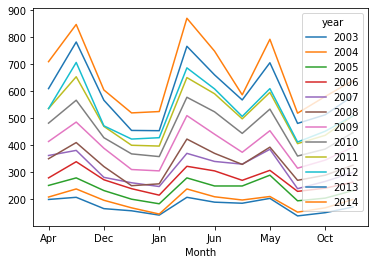

In [23]:
#monthly insight 
update_data.plot()

In [24]:
#yearly plot data
yearly_data=pd.pivot(p,values="Tractor-Sales",index='year',columns='Month')

In [25]:
yearly_data

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


<Figure size 1296x720 with 0 Axes>

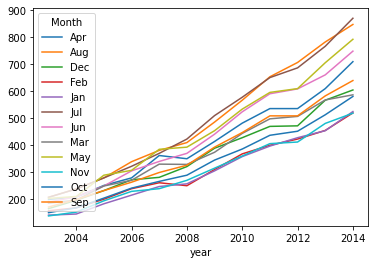

In [108]:
plt.figure(figsize=(18,10))
yearly_data.plot()
plt.show()

<AxesSubplot:>

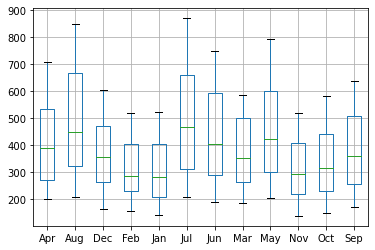

In [27]:
yearly_data.boxplot()

In [28]:
tsales=p['Tractor-Sales']

In [29]:
tsales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

In [30]:
tsales[0:1]

2003-01-01    141
Freq: MS, Name: Tractor-Sales, dtype: int64

In [31]:
tsales[1]

157

<AxesSubplot:xlabel='Tractor-Sales', ylabel='Density'>

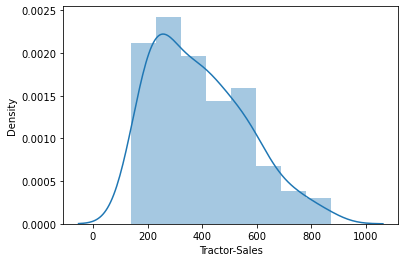

In [32]:
import seaborn as sns
sns.distplot(tsales)

<AxesSubplot:>

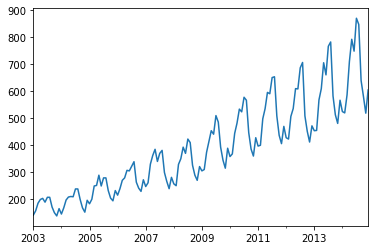

In [33]:
#with respect to the seasonal sales data my train is upwards
tsales.plot()

In [34]:
#decompose data(parameters---residal(error),seasonal,trend)
#inside the data we going to find residal(error),seasonal,trend components of data.
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
decompose_sales=seasonal_decompose(tsales)

In [36]:
decompose_sales

In [37]:
decompose_sales.seasonal  #(.trend,.resid)

2003-01-01   -68.763889
2003-02-01   -66.434343
2003-03-01    -1.638889
2003-04-01    29.952020
2003-05-01    75.876263
                ...    
2014-08-01    90.482323
2014-09-01   -14.233586
2014-10-01   -61.328283
2014-11-01   -88.680556
2014-12-01   -38.763889
Freq: MS, Name: seasonal, Length: 144, dtype: float64

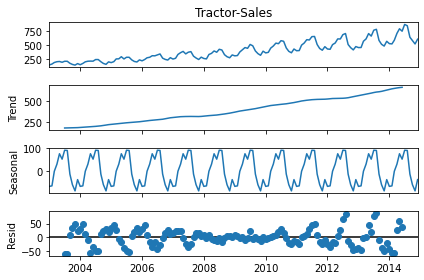

In [40]:
decompose_sales.plot();

<AxesSubplot:>

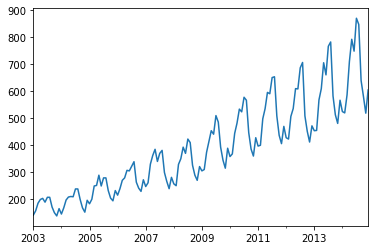

In [39]:
tsales.plot()

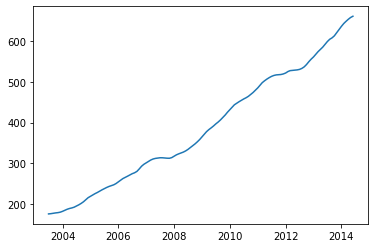

In [40]:
#Longterm direction 
plt.plot(decompose_sales.trend)

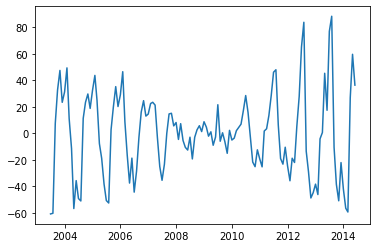

In [41]:
#Irregular fluctuations
plt.plot(decompose_sales.resid)

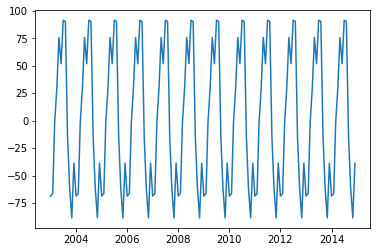

In [42]:
#Periodic Behavior 
plt.plot(decompose_sales.seasonal)

# This is a naive decomposition. More sophisticated methods should be preferred.

The additive model is Y[t] = T[t] + S[t] + e[t]

1.Linear Pattern
2.Constant Variance

The multiplicative model is Y[t] = T[t] * S[t] * e[t]

1.Non-Linear Pattern
2.Non-Constant Variance

Seasonality is a common characteristic of time series. It can appear in two forms: additive and multiplicative.

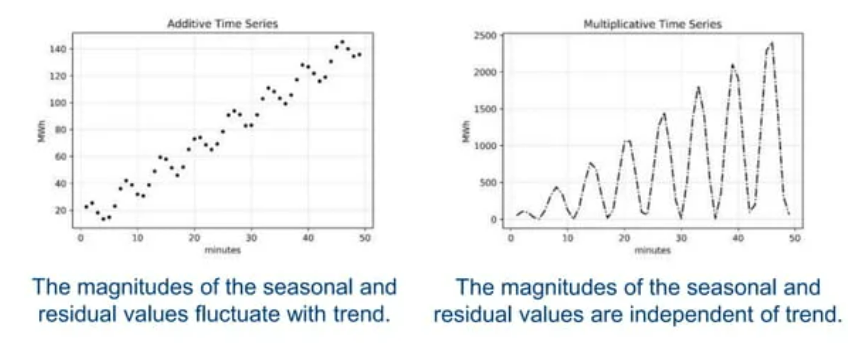

In [43]:
#why we are using moving avg for analysis data
#let we plot rollling stasts(rolling_mean--or--Simple MovinG average)
#Simple moving avg rolling is stattistic and analysics data
# why rolling needed?
#we need to read the data(finding_pattern)--this is--Simple moving avg--called--rolling stats(for analysis my data)
#MovingAvg is also used FOR modelBuilding
tsales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

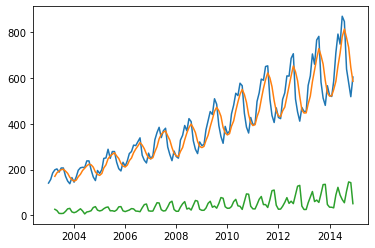

In [46]:
#rolling stats
#simple moving average
plt.plot(tsales)
#we are taking 4 previous value to calculate the mean
plt.plot(tsales.rolling(window=4).mean())
plt.plot(tsales.rolling(window=4).std())

In [44]:
#141+157+185+199/4=170.5(4th value)
#157+185+199+203/4=186.00(5th value)
tsales.rolling(window=4).mean().head(10)

2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
2003-06-01    194.00
2003-07-01    199.50
2003-08-01    201.50
2003-09-01    193.50
2003-10-01    183.75
Freq: MS, Name: Tractor-Sales, dtype: float64

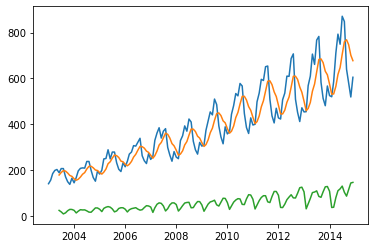

In [47]:
#increasing my window size my curve is getting smooth
#orange line is my smoothening line (data)
plt.plot(tsales)
plt.plot(tsales.rolling(window=6).mean())
plt.plot(tsales.rolling(window=6).std())

In [48]:
tsales.rolling(window=6).mean().head(15)

2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
2003-06-01    179.000000
2003-07-01    190.000000
2003-08-01    198.333333
2003-09-01    196.000000
2003-10-01    187.833333
2003-11-01    177.000000
2003-12-01    173.000000
2004-01-01    162.666667
2004-02-01    156.166667
2004-03-01    160.500000
Freq: MS, Name: Tractor-Sales, dtype: float64

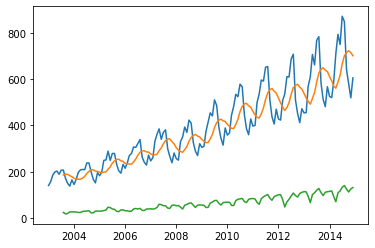

In [49]:
#we are doing smoothening my data/perform smoothening operation respect to my data
#we want to analysis the data over the time period with respect to the mean
#which window=size? we prefer!
plt.plot(tsales)
plt.plot(tsales.rolling(window=8).mean()) #poor window size becuse it little bit smoothening.
plt.plot(tsales.rolling(window=8).std())

In [50]:
tsales.rolling(window=8).mean().head(18)

2003-01-01        NaN
2003-02-01        NaN
2003-03-01        NaN
2003-04-01        NaN
2003-05-01        NaN
2003-06-01        NaN
2003-07-01        NaN
2003-08-01    186.000
2003-09-01    189.750
2003-10-01    188.875
2003-11-01    183.000
2003-12-01    178.750
2004-01-01    171.500
2004-02-01    168.875
2004-03-01    167.625
2004-04-01    167.750
2004-05-01    172.625
2004-06-01    180.000
Freq: MS, Name: Tractor-Sales, dtype: float64

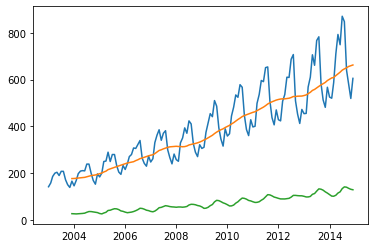

In [51]:
#where windows=12 have smoothining curve where mean is same
#for analysis we need reliable data were smoothning occur
plt.plot(tsales)
plt.plot(tsales.rolling(window=12).mean())
#define std 
plt.plot(tsales.rolling(window=12).std())

 In every year the tractor sales have been increasing without fail. 


• July and August are the peak months for tractor sales 
and the variance and the mean value in July and 
August are also much higher than any of the other 
months.

• We can see a seasonal cycle of 12 months where the 
mean value of each month starts with a increasing 
trend in the beginning of the year and drops down 
towards the end of the year. 

• We can see a seasonal effect with a cycle of 12 months

In [51]:
tsales.rolling(window=12).mean().head(25)

2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
2003-06-01           NaN
2003-07-01           NaN
2003-08-01           NaN
2003-09-01           NaN
2003-10-01           NaN
2003-11-01           NaN
2003-12-01    176.000000
2004-01-01    176.333333
2004-02-01    177.250000
2004-03-01    178.250000
2004-04-01    179.000000
2004-05-01    179.583333
2004-06-01    181.250000
2004-07-01    183.833333
2004-08-01    186.416667
2004-09-01    188.750000
2004-10-01    190.250000
2004-11-01    191.416667
2004-12-01    194.000000
2005-01-01    197.166667
Freq: MS, Name: Tractor-Sales, dtype: float64

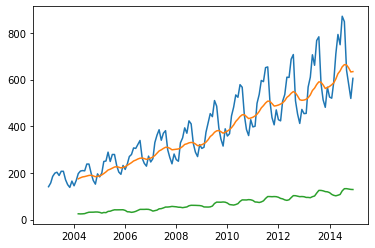

In [52]:
plt.plot(tsales)
plt.plot(tsales.rolling(window=15).mean())
plt.plot(tsales.rolling(window=15).std())

In [53]:
#boxplot
#check the distribution of the data
#analysis month wise
#can you perfrom day wise
#yearly dataset
#plot box plot

#10 20 30 40 50 
#10 20 40 80 160
#t s i + or *

In [52]:
tsales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

In [53]:
#preproceesing(log_transformation,ADFullerTest---check diff diff component of data,wheather my data is stationary or not)
#augmented dicky fuller(check whether it model is stationay or not)
#p-value >0.05 ---not stationary
#p-value<0.05---stationary
from statsmodels.tsa.stattools import adfuller
adfuller(tsales)

(1.1088250591467397,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [54]:
def test_stationary(timeseries):
    rol_mean=timeseries.rolling(12).mean()
    rol_std=timeseries.rolling(12).std()
    
    plt.figure(figsize=(18,10))
    plt.grid('both')
    plt.plot(timeseries)
    plt.plot(rol_mean,label='rol_mean')
    plt.plot(rol_std,label='rol_std')
    plt.legend()
    plt.show()
    
    print("--------------------")
    print("result of Augmented Dicky Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Confidense Interval (%s)'%key] = value
    print(dfoutput)
    

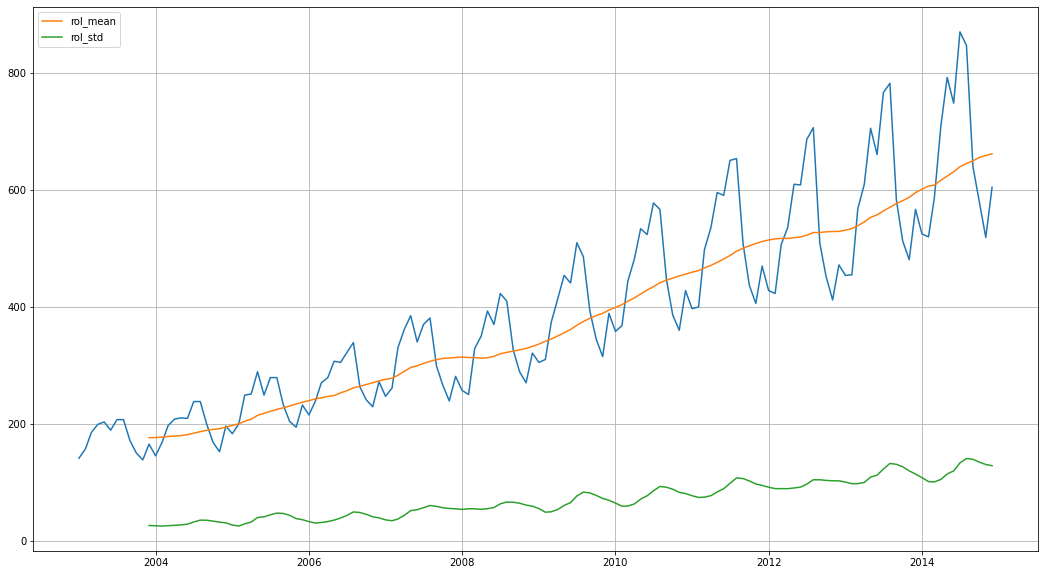

--------------------
result of Augmented Dicky Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Confidense Interval (1%)        -3.482088
Confidense Interval (5%)        -2.884219
Confidense Interval (10%)       -2.578864
dtype: float64


In [55]:
test_stationary(tsales)

# some preprocessing part 
1.difference(periods=1,2..n)
2.log transform for variance
now difference log data for making time series stats on both mean ad variance



In [56]:
#Arima Sarima
#pacf acf (total statical concept to under standard(breif short))
#AIC BIC
#MSE
#prediction
#outofbox forcasting

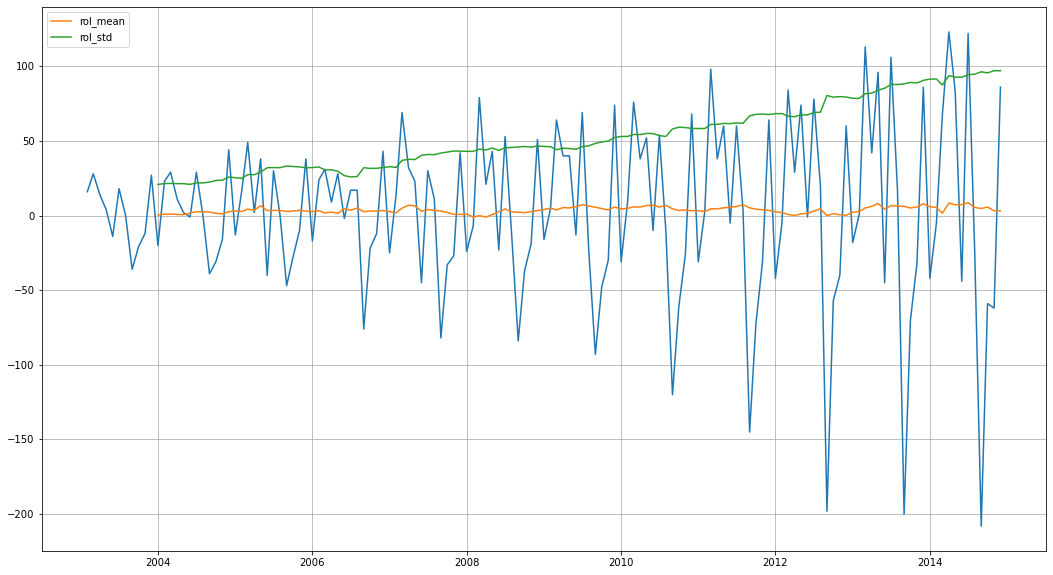

--------------------
result of Augmented Dicky Fuller Test:
Test Statistic                  -2.543481
p-value                          0.105250
#lags Used                      14.000000
Number of Observations Used    128.000000
Confidense Interval (1%)        -3.482501
Confidense Interval (5%)        -2.884398
Confidense Interval (10%)       -2.578960
dtype: float64


In [57]:
#making stationary --differencing
#1period differencing with respect to one period one leg right
one_diff_data=tsales.diff(periods=1)
one_diff_data.dropna(inplace=True)
test_stationary(one_diff_data)

In [58]:
#log function transformation
import numpy as np
log_diff_data1=np.log(tsales).diff(periods=1).dropna()

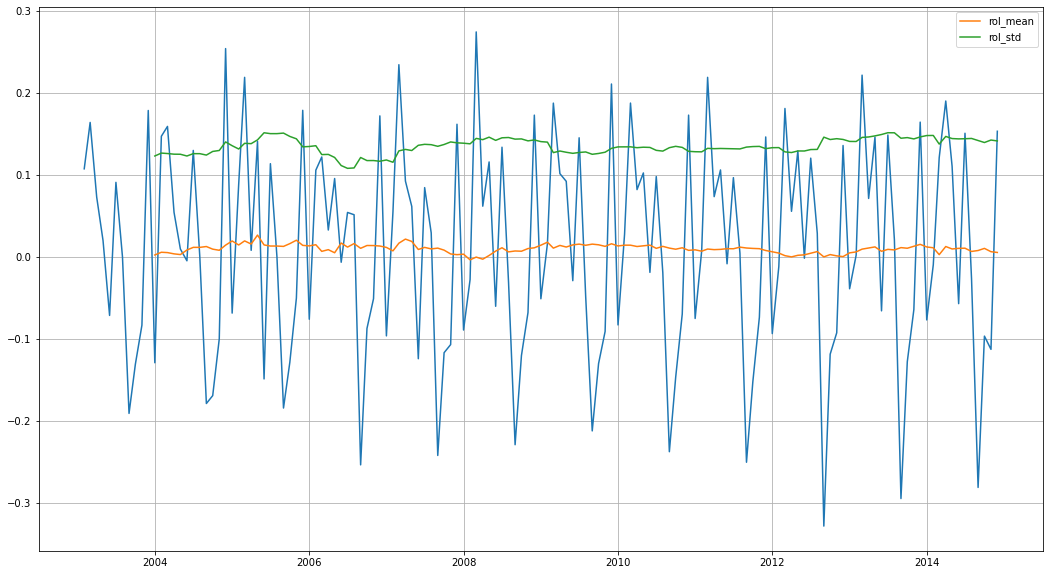

--------------------
result of Augmented Dicky Fuller Test:
Test Statistic                  -2.680467
p-value                          0.077480
#lags Used                      14.000000
Number of Observations Used    128.000000
Confidense Interval (1%)        -3.482501
Confidense Interval (5%)        -2.884398
Confidense Interval (10%)       -2.578960
dtype: float64


In [60]:
test_stationary(log_diff_data1)

In [62]:
log_diff_data2=np.log(tsales).diff(periods=2).dropna()

In [109]:
log_diff_data2

2003-03-01    0.271596
2003-04-01    0.237059
2003-05-01    0.092850
2003-06-01   -0.051558
2003-07-01    0.019513
                ...   
2014-08-01    0.124142
2014-09-01   -0.308174
2014-10-01   -0.378130
2014-11-01   -0.209564
2014-12-01    0.040478
Freq: MS, Name: Tractor-Sales, Length: 142, dtype: float64

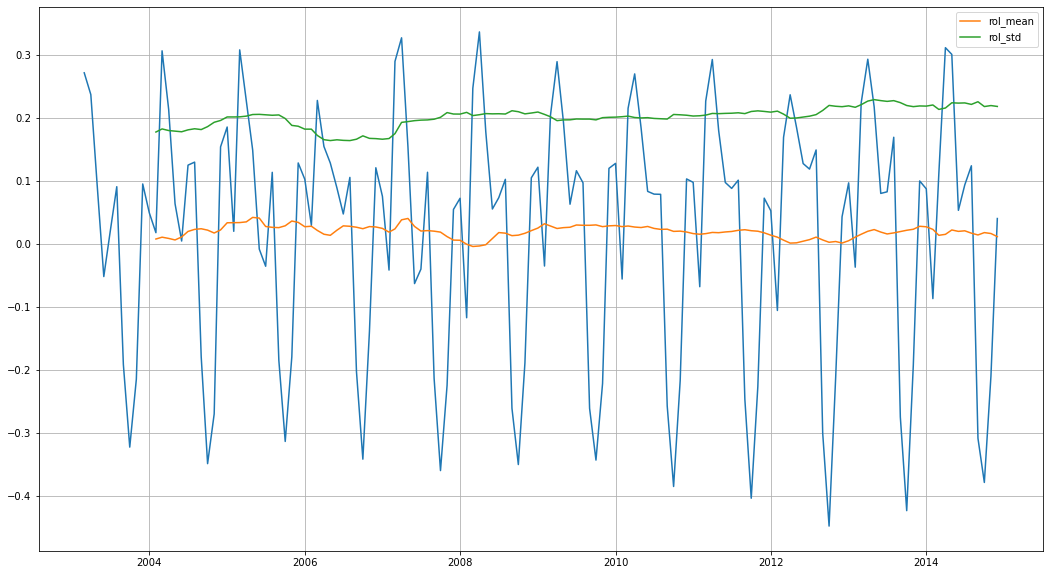

--------------------
result of Augmented Dicky Fuller Test:
Test Statistic                  -3.200722
p-value                          0.019943
#lags Used                      11.000000
Number of Observations Used    130.000000
Confidense Interval (1%)        -3.481682
Confidense Interval (5%)        -2.884042
Confidense Interval (10%)       -2.578770
dtype: float64


In [63]:
test_stationary(log_diff_data2)

In [64]:
#pvalue is less than 0.05 now its stationay
#lags find difference from current to previous means(jumming current,next,previous timestamp,)

In [64]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

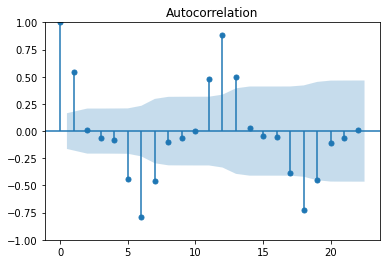

In [65]:
#ACF is to get the corelation within the same variable…time to time

smt.graphics.plot_acf(log_diff_data2);

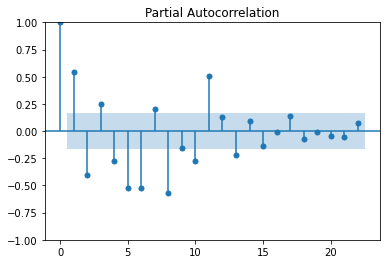

In [66]:
smt.graphics.plot_pacf(log_diff_data2);

In [68]:
#model building
#p=auto regression
#d=differencing
#q=moving_average
#from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(data,order=(p,d,q))
#model.fit()
#model.forecast()

In [67]:
#np.aqrt(mean_squared_error(y,prediction))
len(tsales)
#12months
#last2 year as testdata
##24
#144-24=120

144

In [68]:
#stationary_data
log_diff_data2.dtype

dtype('float64')

In [69]:
train_data=log_diff_data2[:120]
test_data=log_diff_data2[120:]

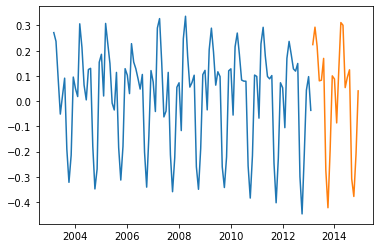

In [70]:
plt.plot(train_data)
plt.plot(test_data)

In [71]:
data=[i for i in train_data]
data

[0.27159593470015597,
 0.23705901937618457,
 0.09285015396346274,
 -0.051557809664849685,
 0.019512814223581643,
 0.09097177820572622,
 -0.19105523676270852,
 -0.3220834991691133,
 -0.2144098713454552,
 0.09531017980432477,
 0.049480057263369126,
 0.018018505502678472,
 0.3064699863174143,
 0.21357410029805912,
 0.06390380197947998,
 0.004796172263493048,
 0.12516314295400655,
 0.12993642170666408,
 -0.17896584894698275,
 -0.34830669426821625,
 -0.2694243038782158,
 0.15415067982725805,
 0.1856056319951449,
 0.020202707317519497,
 0.307966743623286,
 0.22713557258374717,
 0.14897379164772495,
 -0.008000042667076102,
 -0.03521490629106694,
 0.11375888535665801,
 -0.1844744101550555,
 -0.3130917879771493,
 -0.17887921260298167,
 0.12861737782209381,
 0.10277986906433423,
 0.02972618026520113,
 0.22778393087071258,
 0.15474822988985437,
 0.1284257885888218,
 0.08909999478604647,
 0.04770379795721169,
 0.10568833077303807,
 -0.2023975133666438,
 -0.34120317388979515,
 -0.13843202862352477,

In [154]:
tsales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

In [155]:
train.tail()

2012-08-01    707
2012-09-01    509
2012-10-01    452
2012-11-01    412
2012-12-01    472
Freq: MS, Name: Tractor-Sales, dtype: int64

In [156]:
train=tsales[:120]
test=tsales[120:]

In [160]:
#model building
from statsmodels.tsa.arima.model import ARIMA
mdl=ARIMA(train,order=(12,2,9))

In [161]:
m_fit=mdl.fit()
m_fit

C:\Users\kamal\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [162]:
b=m_fit.forecast(steps=90)
b

2013-01-01    448.030816
2013-02-01    414.265533
2013-03-01    517.355870
2013-04-01    532.687244
2013-05-01    613.749939
                 ...    
2020-02-01    520.773495
2020-03-01    608.078977
2020-04-01    631.488799
2020-05-01    656.153623
2020-06-01    720.876253
Freq: MS, Name: predicted_mean, Length: 90, dtype: float64

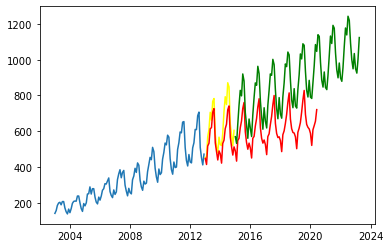

In [163]:
plt.plot(train)
plt.plot(test,color="yellow")
plt.plot(b,color="red")
plt.plot(a,color="green")

In [ ]:
import numpy as np


In [144]:
rmse=np.sqrt(mean_squared_error(test,b))
rmse

86.13694572813559

In [146]:
#model building
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(tsales,order=(12,2,9))

In [147]:
m_fit=model.fit()
m_fit

C:\Users\kamal\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [148]:
a=m_fit.forecast(steps=100)

In [149]:
m_fit.bic

1330.4863865615819

In [150]:
m_fit.aic

1265.458191294354

In [151]:
a

2015-01-01     569.582752
2015-02-01     532.273068
2015-03-01     636.908273
2015-04-01     743.611696
2015-05-01     828.568046
                 ...     
2022-12-01    1034.358378
2023-01-01     949.380630
2023-02-01     924.850718
2023-03-01    1001.796609
2023-04-01    1123.659839
Freq: MS, Name: predicted_mean, Length: 100, dtype: float64

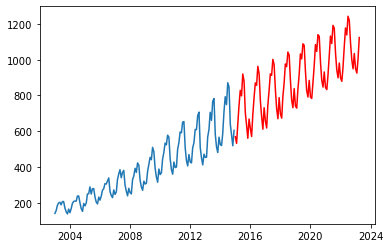

In [152]:
plt.plot(tsales)
plt.plot(a,color="red")

In [120]:
tsales[100:]
#its is predicting [121]

2011-05-01    596
2011-06-01    591
2011-07-01    651
2011-08-01    654
2011-09-01    509
2011-10-01    437
2011-11-01    406
2011-12-01    470
2012-01-01    428
2012-02-01    423
2012-03-01    507
2012-04-01    536
2012-05-01    610
2012-06-01    609
2012-07-01    687
2012-08-01    707
2012-09-01    509
2012-10-01    452
2012-11-01    412
2012-12-01    472
2013-01-01    454
2013-02-01    455
2013-03-01    568
2013-04-01    610
2013-05-01    706
2013-06-01    661
2013-07-01    767
2013-08-01    783
2013-09-01    583
2013-10-01    513
2013-11-01    481
2013-12-01    567
2014-01-01    525
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, dtype: int64

In [86]:
m_fit.bic

-144.6080990797604

In [72]:
#model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
print("TEST DATA:",train_data)
print('='*35)
print("LENGTH DATA :",len(train_data))

TEST DATA: 2003-03-01    0.271596
2003-04-01    0.237059
2003-05-01    0.092850
2003-06-01   -0.051558
2003-07-01    0.019513
                ...   
2012-10-01   -0.447348
2012-11-01   -0.211425
2012-12-01    0.043297
2013-01-01    0.097074
2013-02-01   -0.036682
Freq: MS, Name: Tractor-Sales, Length: 120, dtype: float64
LENGTH DATA : 120


In [74]:
print("TEST DATA:",test_data)
print('='*35)
print("LENGTH DATA :",len(test_data))

TEST DATA: 2013-03-01    0.224024
2013-04-01    0.293162
2013-05-01    0.217494
2013-06-01    0.080295
2013-07-01    0.082872
2013-08-01    0.169379
2013-09-01   -0.274300
2013-10-01   -0.422857
2013-11-01   -0.192320
2013-12-01    0.100083
2014-01-01    0.087531
2014-02-01   -0.086530
2014-03-01    0.111627
2014-04-01    0.311436
2014-05-01    0.300798
2014-06-01    0.053474
2014-07-01    0.093819
2014-08-01    0.124142
2014-09-01   -0.308174
2014-10-01   -0.378130
2014-11-01   -0.209564
2014-12-01    0.040478
Freq: MS, Name: Tractor-Sales, dtype: float64
LENGTH DATA : 22


In [75]:
print("DATA:",log_diff_data2.head())
print('='*35)
print("LENGTH DATA :",len(log_diff_data2))

DATA: 2003-03-01    0.271596
2003-04-01    0.237059
2003-05-01    0.092850
2003-06-01   -0.051558
2003-07-01    0.019513
Freq: MS, Name: Tractor-Sales, dtype: float64
LENGTH DATA : 142


In [87]:
#model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
#expalin formatting of data(data format)
#write function to create arima model
def arima_model(X,y,arima_order):
    history=[i for i in train_data]
    prediction=list()
    for i in range(len(y)):
        mdl=ARIMA(X,order=arima_order)
        mdl_fit=mdl.fit()
        yhat=mdl_fit.forecast()
        prediction.append(yhat)
        history.append(y[i])
    rmse=np.sqrt(mean_squared_error(y,prediction))
    return rmse

In [93]:
def evalute_arima_model(dataset,test,p_value,d_value,q_value):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order=(i,j,k)
               
                try:
                    rmse=arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg=rmse,order
                    print("ARIMA%s, RMSE=%.3f" %(order,rmse))
                except Exception as e:
                    print(e)
                    print("error")
                    continue
            
    print(f"best_score and best_cfg {best_score} {best_cfg}")

In [98]:
p_value=range(1,3)
d_value=range(1,3)
q_value=range(1,3)

In [99]:
#permutation and combination of all values
evalute_arima_model(train_data,test_data,p_value,d_value,q_value)

ARIMA(1, 1, 1), RMSE=0.222
ARIMA(1, 1, 2), RMSE=0.219
ARIMA(1, 2, 1), RMSE=0.229
ARIMA(1, 2, 2), RMSE=0.222
ARIMA(2, 1, 1), RMSE=0.237
ARIMA(2, 1, 2), RMSE=0.236
ARIMA(2, 2, 1), RMSE=0.241
ARIMA(2, 2, 2), RMSE=0.242
best_score and best_cfg 0.2186784146590894 (1, 1, 2)


In [100]:
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(1,1,2))
    model_fit = model.fit()
    fc= model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 0.142925233205253


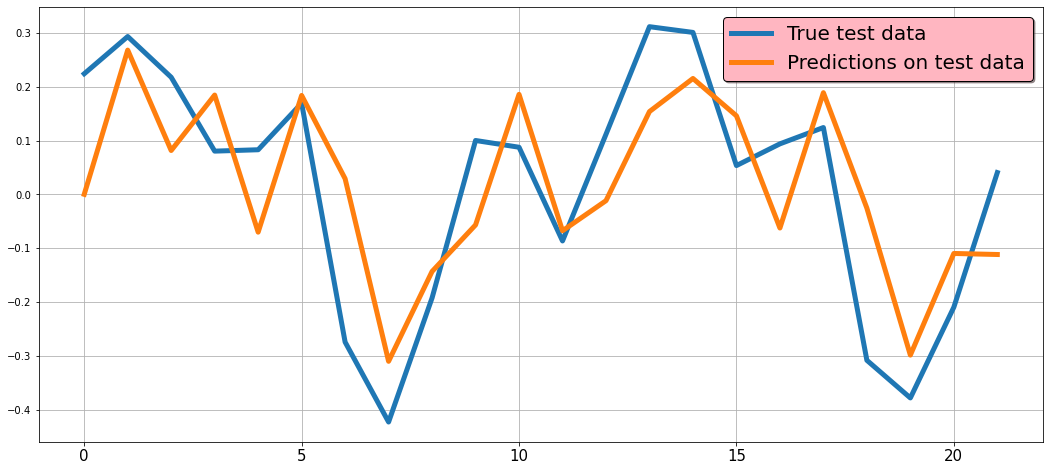

In [106]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True test data', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

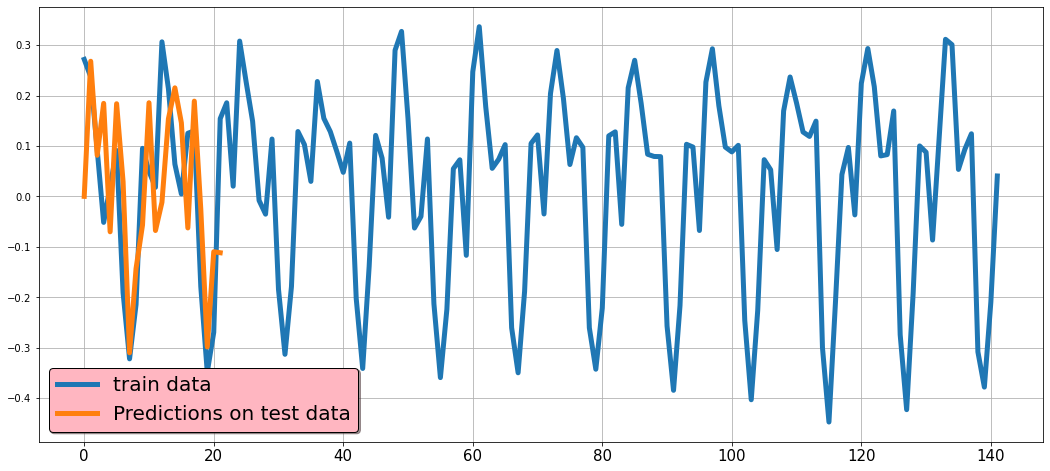

In [105]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(history)),history, label = 'train data', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

def evalute_arima_model(dataset,test,p_value,d_value,q_value):
    best_score,best_cfg=float('inf'),None
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order=(i,j,k)
                rmse=arima_model(dataset,test,order)
                               
                try:
                    rmse=arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg=rmse,order
                    print("ARIMA%s, RMSE=%.3f" %(order,rmse))
                except Exception as e:
                    print(e)
                    print("error")
                    continue
            
    print(best_score,best_cfg)

In [90]:
p_value=range(0,2)
d_value=range(0,2)
q_value=range(0,2)

In [91]:
#permutation and combination of all values
evalute_arima_model(train_data,test_data,p_value,d_value,q_value)

ARIMA(0, 0, 0), RMSE=0.218
ARIMA(0, 0, 1), RMSE=0.219
ARIMA(0, 1, 0), RMSE=0.225
ARIMA(0, 1, 1), RMSE=0.245
ARIMA(1, 0, 0), RMSE=0.220
ARIMA(1, 0, 1), RMSE=0.219
ARIMA(1, 1, 0), RMSE=0.228
ARIMA(1, 1, 1), RMSE=0.222
best_score and best_cfg 0.21786019477192128 (0, 0, 0)


In [92]:
train_data[1]

0.23705901937618457

In [93]:
test_data.head()

2013-03-01    0.224024
2013-04-01    0.293162
2013-05-01    0.217494
2013-06-01    0.080295
2013-07-01    0.082872
Freq: MS, Name: Tractor-Sales, dtype: float64